**Sales & Demand Forecasting - Task1**

1. Import required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline


2. Load Dataset (Superstore Sales – Kaggle)

In [3]:
data = pd.read_csv(
    r"C:\Users\97798\Downloads\archive (4)\Sample - Superstore.csv",
    encoding="latin1",
    parse_dates=['Order Date']
)

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


3. Data Cleaning

In [4]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Remove missing values
data = data.dropna(subset=['Order Date', 'Sales'])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

4. Time-Based Feature Engineering

In [5]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Monthly aggregation
monthly_sales = data.groupby(['Year','Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year','Month']].assign(DAY=1))
monthly_sales = monthly_sales[['Date','Sales']]

monthly_sales.head()


,Date,Sales
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28295.345
4,2014-05-01,23648.287


5. Sales Trend Visualization

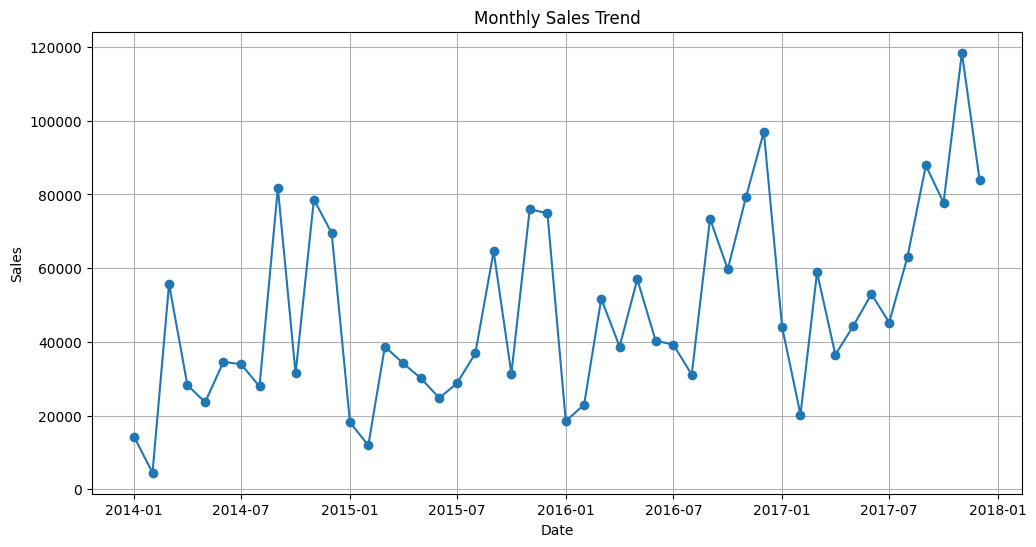

In [6]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


6. Feature Creation(Lag Feature)

In [7]:
monthly_sales['Prev_Month_Sales'] = monthly_sales['Sales'].shift(1)
monthly_sales.dropna(inplace=True)


7. Train-Test Split

In [8]:
X = monthly_sales[['Prev_Month_Sales']]
y = monthly_sales['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())


   Prev_Month_Sales
1         14236.895
2          4519.892
3         55691.009
4         28295.345
5         23648.287
    Prev_Month_Sales
38        20301.1334
39        58872.3528
40        36521.5361
41        44261.1102
42        52981.7257
1     4519.8920
2    55691.0090
3    28295.3450
4    23648.2870
5    34595.1276
Name: Sales, dtype: float64
38    58872.3528
39    36521.5361
40    44261.1102
41    52981.7257
42    45264.4160
Name: Sales, dtype: float64


*The dataset was split into 37 training samples and 10 testing samples, with previous month sales as input and current month sales as output, maintaining time order for forecasting*

In [9]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (37, 1)
X_test shape: (10, 1)
y_train shape: (37,)
y_test shape: (10,)


8. Model Training(Random Forest Regressor)

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

9. Model Evaluation

In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 30082.90
RMSE: 32387.60


10. Actual vs Predicted Visualization

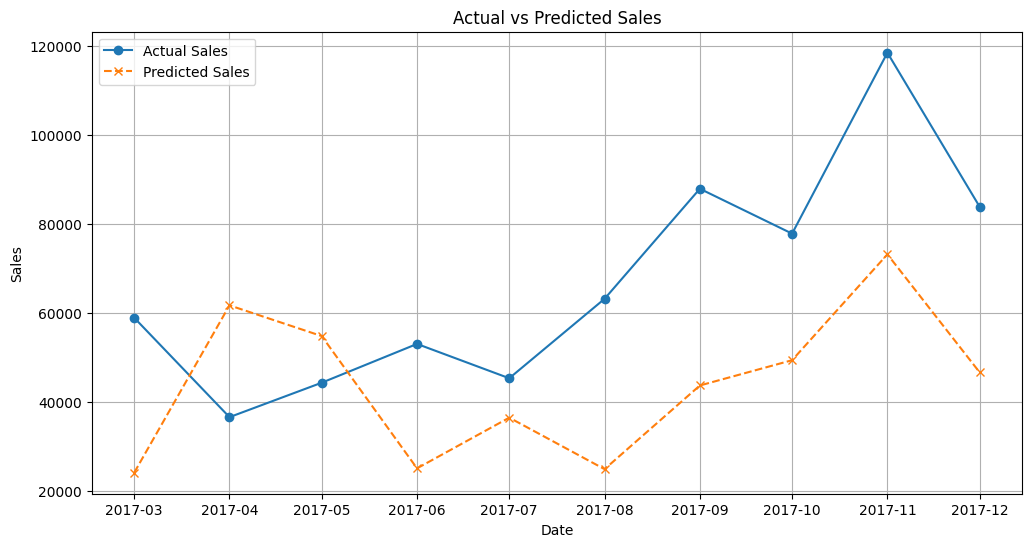

In [17]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'][-len(y_test):], y_test, label="Actual Sales", marker='o')
plt.plot(monthly_sales['Date'][-len(y_test):], y_pred, label="Predicted Sales", linestyle='--', marker='x')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.savefig("outputs/actual_vs_predicted_sales.png", dpi=300)
plt.legend()
plt.grid(True)
plt.show()


11. Future 6-Month Sales Forecast

In [13]:
last_sales = monthly_sales['Sales'].iloc[-1]

future_dates = pd.date_range(
    start=monthly_sales['Date'].iloc[-1] + pd.DateOffset(months=1),
    periods=6,
    freq='MS'
)

future_predictions = []

for _ in range(6):
    pred = model.predict(np.array([[last_sales]]))[0]
    future_predictions.append(pred)
    last_sales = pred

future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_Sales": future_predictions
})

future_df


C:\Users\97798\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\97798\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\97798\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\97798\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\97798\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have

,Date,Predicted_Sales
0,2018-01-01,51112.591831
1,2018-02-01,36407.073344
2,2018-03-01,54006.988560
3,2018-04-01,31702.461044
4,2018-05-01,74557.149235
5,2018-06-01,31902.238514


12. Save Data for Power BI

In [15]:
forecast_df = pd.DataFrame({
    "Date": monthly_sales['Date'][-len(y_test):],
    "Actual_Sales": y_test.values,
    "Predicted_Sales": y_pred
})

forecast_df.to_csv("sales_forecast.csv", index=False)
future_df.to_csv("future_sales_forecast.csv", index=False)


Save future forecast figure

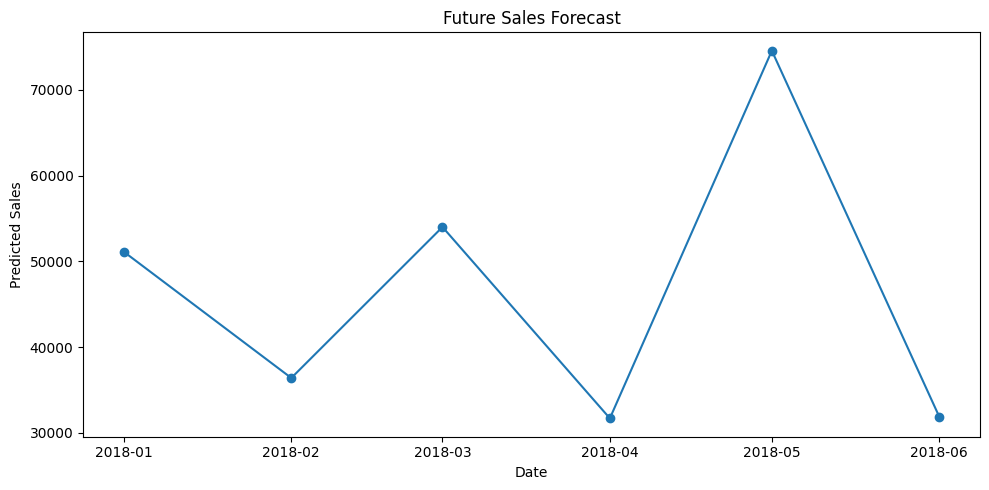

In [19]:
plt.figure(figsize=(10,5))
plt.plot(future_df["Date"], future_df["Predicted_Sales"], marker='o')

plt.title("Future Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.tight_layout()

plt.savefig("outputs/future_sales_forecast.png", dpi=300)

plt.show()
